<strong style="margin-left:42%;font-size:30px;font-weight:600;"><h1>UAS</h1></strong>
<p style="margin-left:33.3333%;font-size:20px;font-weight:600;color:blue;">GRAFIKA KOMPUTER</p>
<p style="margin-left:30%;font-size:20px;font-weight:600;">Maftuh Mashuri (11160940000076)</p>

## a. Melakukan eksplorasi data, yaitu melihat nilai rata-rata dan modus pixel dari setiap gambar dalam setiap kategori.

# import basic modul

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob, os, random

# import sklearn modul

In [2]:
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import datasets,metrics

### - load data image

In [64]:
data_dir = 'data'
class_dir_list = ['banjir', 'kebakaran']

images_data = {}
for class_dir in class_dir_list:

    images_data[class_dir] = []

    for image_name in glob.glob(os.path.join(data_dir, class_dir, '*.jpeg')):
        image = cv.imread(image_name)
        images_data[class_dir].append(image)

In [105]:
def bgr2rgb(img):
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)
def rgb2bgr(imge):
    return cv.cvtColor(img, cv.COLOR_RGB2BGR)
def bgr2gray(img):
    return cv.cvtColor(img, cv.COLOR_BGR2GRAY)

def show_image(img, img_name = 'Image', to_gray = True, reshape = []):
    if len(reshape) != 0:
        img = img.reshape(tuple(reshape))
    if to_gray:
        img = bgr2rgb(img)
    plt.imshow(img)
    plt.title(img_name)
    plt.show()

In [108]:
def show_images(data, img_name = 'Image', to_gray = True, sample = 0, reshape = []):

    index = sample

    if type(data) is dict:
        for key in data:
            if sample !=0:
                index = random.randint(0, len(data[key])-1)
            show_image(data[key][index], key, to_gray, reshape)

    elif type(data) is list:
        if sample !=0:
            index = random.randint(0, len(data)-1)

        data = data[index]
        show_image(data, img_name, to_gray, reshape)

    else:
        return False

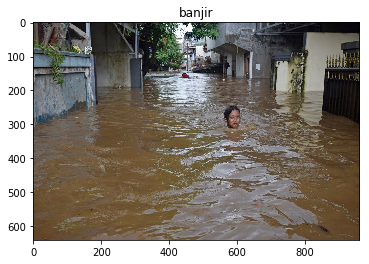

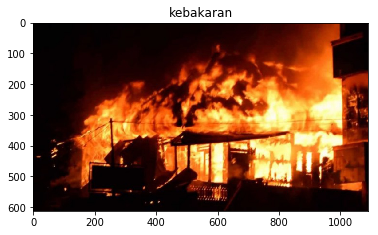

In [109]:
show_images(images_data, sample=True)

### - jumlah data masing-masing kategori

In [110]:
def count_images(data):
    if type(data) is dict:
        for key in data:
            n = len(data[key])
            print('Jumlah gambar', key, 'sebanyak', n, 'gambar')

    elif type(data) is list:
        n = len(data)
        print('Jumlah gambar sebanyak', gambar, 'gambar')

In [111]:
count_images(images_data)

Jumlah gambar banjir sebanyak 44 gambar
Jumlah gambar kebakaran sebanyak 44 gambar


### - fungsi image shape

In [112]:
def images_shape(images):
    shapes = []
    for img in images:
        shapes.append(img.shape)
    return shapes

In [113]:
data = {}
for images in images_data:
    data[images] = images_shape(images_data[images])

pd.DataFrame(data, index = ['image'+str(i) for i in range(len(images_data[images]))]).T

,image0,image1,image2,image3,image4,image5,image6,image7,image8,image9,...,image34,image35,image36,image37,image38,image39,image40,image41,image42,image43
banjir,"(366, 650, 3)","(562, 750, 3)","(665, 1000, 3)","(500, 750, 3)","(955, 1433, 3)","(768, 1024, 3)","(544, 970, 3)","(480, 640, 3)","(720, 1280, 3)","(500, 750, 3)",...,"(1067, 1600, 3)","(853, 640, 3)","(870, 1406, 3)","(960, 1440, 3)","(640, 960, 3)","(1283, 2527, 3)","(500, 750, 3)","(500, 750, 3)","(405, 720, 3)","(1688, 3000, 3)"
kebakaran,"(613, 1090, 3)","(683, 1024, 3)","(960, 1440, 3)","(365, 650, 3)","(720, 1280, 3)","(533, 800, 3)","(536, 1000, 3)","(768, 1024, 3)","(400, 800, 3)","(393, 700, 3)",...,"(720, 1280, 3)","(450, 800, 3)","(430, 822, 3)","(1366, 683, 3)","(515, 760, 3)","(498, 800, 3)","(450, 675, 3)","(336, 448, 3)","(393, 700, 3)","(500, 750, 3)"


### - image min/max

In [114]:
def images_min_max(images):
    min_max = []
    for img in images:
        min_max.append((img.min(), img.max()))
    return min_max

In [115]:
print('min/max images')
for images in images_data:
    data[images] = images_shape(images_data[images])

pd.DataFrame(data, index = ['image'+str(i) for i in range(len(images_data[images]))]).T

min/max images


,image0,image1,image2,image3,image4,image5,image6,image7,image8,image9,...,image34,image35,image36,image37,image38,image39,image40,image41,image42,image43
banjir,"(366, 650, 3)","(562, 750, 3)","(665, 1000, 3)","(500, 750, 3)","(955, 1433, 3)","(768, 1024, 3)","(544, 970, 3)","(480, 640, 3)","(720, 1280, 3)","(500, 750, 3)",...,"(1067, 1600, 3)","(853, 640, 3)","(870, 1406, 3)","(960, 1440, 3)","(640, 960, 3)","(1283, 2527, 3)","(500, 750, 3)","(500, 750, 3)","(405, 720, 3)","(1688, 3000, 3)"
kebakaran,"(613, 1090, 3)","(683, 1024, 3)","(960, 1440, 3)","(365, 650, 3)","(720, 1280, 3)","(533, 800, 3)","(536, 1000, 3)","(768, 1024, 3)","(400, 800, 3)","(393, 700, 3)",...,"(720, 1280, 3)","(450, 800, 3)","(430, 822, 3)","(1366, 683, 3)","(515, 760, 3)","(498, 800, 3)","(450, 675, 3)","(336, 448, 3)","(393, 700, 3)","(500, 750, 3)"


### - image size

In [116]:
def images_size(images):
    sizes = []
    for img in images:
        sizes.append(img.size)
    return sizes

In [117]:
print('Size images')
for images in images_data:
    data[images] = images_size(images_data[images])

pd.DataFrame(data, index = ['image'+str(i) for i in range(len(images_data[images]))]).T

Size images


,image0,image1,image2,image3,image4,image5,image6,image7,image8,image9,...,image34,image35,image36,image37,image38,image39,image40,image41,image42,image43
banjir,713700,1264500,1995000,1125000,4105545,2359296,1583040,921600,2764800,1125000,...,5121600,1637760,3669660,4147200,1843200,9726423,1125000,1125000,874800,15192000
kebakaran,2004510,2098176,4147200,711750,2764800,1279200,1608000,2359296,960000,825300,...,2764800,1080000,1060380,2798934,1174200,1195200,911250,451584,825300,1125000


### - images mean

In [118]:
def images_mean(images):
    means = []
    for img in images:
        means.append(img.mean())
    return means

In [119]:
print('Mean images')
for images in images_data:
    data[images] = images_mean(images_data[images])

pd.DataFrame(data, index = ['image'+str(i) for i in range(len(images_data[images]))]).T

Mean images


,image0,image1,image2,image3,image4,image5,image6,image7,image8,image9,...,image34,image35,image36,image37,image38,image39,image40,image41,image42,image43
banjir,111.502687,101.790070,93.217333,123.873620,88.915539,141.335981,133.576583,164.348459,104.535732,102.762551,...,118.283704,113.693227,126.617984,67.923235,103.070118,149.866392,93.158812,110.423127,88.500784,118.905505
kebakaran,59.876358,67.218099,53.493390,55.015237,88.870063,92.774455,109.341309,38.279299,36.969418,100.174378,...,139.982787,94.072834,72.717182,49.864585,103.660019,87.560031,52.606242,92.018936,114.427545,119.760238


### - images modus

In [120]:
def images_modus(images):
    modus = []
    for img in images:
        img = np.array(img.flatten())
        counts = np.bincount(img)
        modus.append(np.argmax(counts))
    return modus

In [121]:
print('Modus images')
for images in images_data:
    data[images] = images_modus(images_data[images])

pd.DataFrame(data, index = ['image'+str(i) for i in range(len(images_data[images]))]).T

Modus images


,image0,image1,image2,image3,image4,image5,image6,image7,image8,image9,...,image34,image35,image36,image37,image38,image39,image40,image41,image42,image43
banjir,11,0,0,117,13,151,201,255,0,105,...,0,187,255,0,254,229,62,136,31,151
kebakaran,0,255,0,0,255,0,255,4,0,255,...,247,255,8,4,255,254,4,62,233,255


## b. Melihat sebaran data menggunakan PCA dan TSNE.

In [122]:
def resize_images(data, dimension = [200,200]):
    dimension = tuple(dimension)

    if type(data) is dict:
        result = {}
        for key in data:
            
            result[key] = []
            for img in data[key]:
                img = cv.resize(img, dimension)
                result[key].append(img)

    elif type(data) is list:
        result = []
        for img in data:
            img = cv.resize(img, dimension)
            result.append(img)

    elif type(data) is np.ndarray:
        result = cv.resize(data, dimension)
    else:
        return False

    return result

In [123]:
def reshape_1d(img, resize, to_gray = True):
    img = resize_images(img, resize)
    if to_gray:
        img = bgr2gray(img)
    return img.reshape(-1)

In [124]:
def reshape_images_1d(data, resize, to_gray = True, merge_class_dict = False):

    if type(data) is dict:
        for key in data:
            img = reshape_1d(data[key][0], resize, to_gray)
            result = np.array([img.flatten()])
            break

        for key in data:
            for img in data[key]:
                img = reshape_1d(img, resize, to_gray)
                result = np.concatenate((result, [img.flatten()]), axis=0)
        result = np.delete(result, 0, 0)

    elif type(data) is list:
        img = reshape_1d(data[0], resize, to_gray)
        result = np.array([img.flatten()])

        for img in data[1:]:
            img = reshape_1d(img, resize, to_gray)
            result = np.concatenate((result, [img.flatten()]), axis=0)

    elif type(data) is np.ndarray:
        result = reshape_1d(data, resize, to_gray)
    else:
        return False
    return result

In [23]:
# def reshape_images_1d(images, resize, to_gray = True, merge_class_dict = False):
#     images = resize_images(images, resize)
#     if to_gray:
#         images[0] = cv.cvtColor(images[0], cv.COLOR_BGR2GRAY)
#     data = np.array([images[0].flatten()])

#     for image in images[1:]:
#         if to_gray:
#             image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
#         data = np.concatenate((data, [image.flatten()]), axis=0)
#     return data

In [84]:
images_data_200x200 = resize_images(images_data)
# for images in images_data:
#     images_data_200x200[images] = resize_images(images_data[images])
# images_data_200x200['banjir'][0].shape

In [81]:
len(reshape_images_1d(images_data, (200,200)))

88

In [85]:
images_data_1d = {}
for images in images_data_200x200:
    images_data_1d[images] = reshape_images_1d(images_data[images], (200, 200))

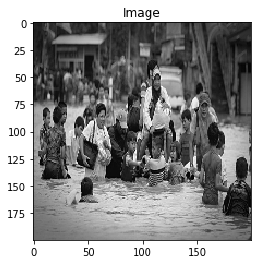

In [90]:
rand = random.randint(0, 43)
show_image(images_data_1d['banjir'][rand].reshape((200, 200)))

In [60]:
tsne = TSNE(n_components=2, init = 'pca', random_state=0)
X_TSNE = {}
for images in images_data_1d:
    X_TSNE[images] = tsne.fit_transform(images_data_1d[images]).T

In [61]:
pd.DataFrame(X_TSNE['banjir'])

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,5886.758789,-1289.136597,-5765.428711,3007.113037,-1905.842896,6062.216309,6343.120117,13951.567383,-3806.117188,-301.382294,...,4151.165039,4135.572266,9091.286133,-8613.324219,868.876343,5729.153809,-3777.622559,-73.230225,-3845.515869,2460.638672
1,-3544.941895,-5105.520996,5440.550293,635.724609,-1547.146484,2461.517090,-309.856628,3737.396973,3364.076904,532.432617,...,-1745.980469,-10186.933594,-1010.780701,4326.035156,-2575.558594,8227.668945,-1498.029785,2210.368896,-3127.313477,-1304.587769


In [62]:
pd.DataFrame(X_TSNE['kebakaran'])

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-7883.279297,142.860687,-3888.477783,-9542.976562,3513.983154,1047.542847,6353.095215,-6012.101074,-8311.463867,6750.109863,...,14384.531250,6086.072754,3182.361816,-10430.950195,8269.860352,3673.330322,-9022.674805,3186.687500,10754.950195,9857.307617
1,-4467.371094,-5856.428711,2906.436035,3745.927734,-408.144409,1404.359253,3570.268066,-2431.785400,2261.854736,13728.199219,...,-5642.421387,11556.500977,2437.433105,1019.332092,-8084.573242,-8095.039551,-1079.066528,4410.404785,-4896.554688,2433.227783


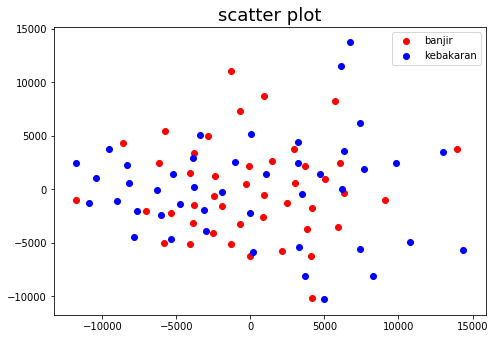

In [63]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
color = ['r', 'b']
i = 0
for images in X_TSNE:
    ax.scatter(X_TSNE[images][0], X_TSNE[images][1], color=color[i])
    i += 1
ax.legend(class_dir_list)
ax.set_title('scatter plot', fontsize = 18)
plt.show()

## c. Melakukan data augmentasi untuk masing-masing kategori gambar.

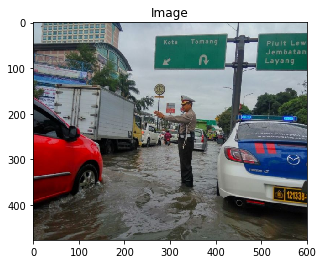

In [67]:
def scale_image(image):
    persen_width = random.randint(10, 40)/100
    persen_height = random.randint(10, 40)/100
    shape = image.shape
    dimension = (int(shape[1]*(1-persen_width)), int(shape[0]*(1-persen_height)))
    return cv.resize(image, dimension)

show_image(scale_image(images_data['banjir'][1]))

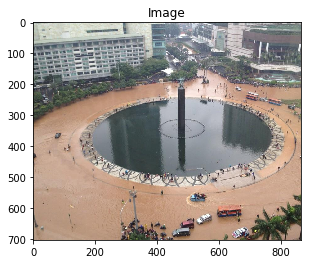

In [68]:
def crop_image(image):
    left = random.randint(0, 150)
    top = random.randint(0, 100)
    right = random.randint(0, 100)
    buttom = random.randint(0, 150)
    shape = image.shape

    return image[left:(shape[0]-right), top:(shape[1]-buttom)]

show_image(crop_image(images_data['banjir'][5]))

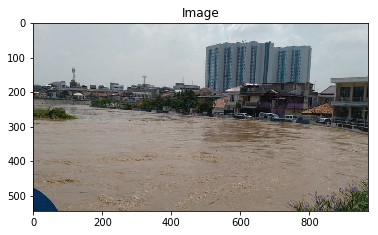

In [69]:
def flip_image(image):
    return cv.flip(image, 1)

show_image(flip_image(images_data['banjir'][6]))

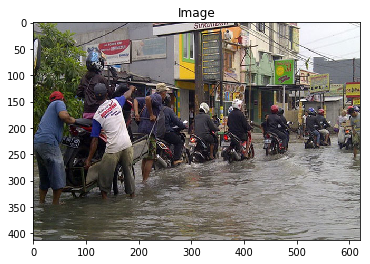

In [70]:
def rotate_image(image):
    degree = random.randint(-10, 10)
    shape = image.shape
    M = cv.getRotationMatrix2D(((shape[1]-1)/2.0,(shape[0]-1)/2.0), degree, 1)
    return cv.warpAffine(image, M, (shape[1],shape[0]))

show_image(rotate_image(images_data['banjir'][12]))

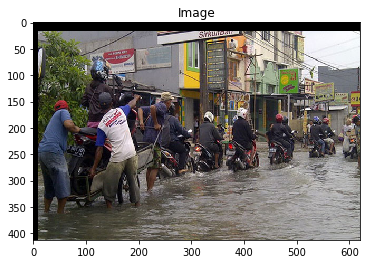

In [71]:
def translate_image(image):
    x = random.randint(-25, 25)
    y = random.randint(-25, 25)
    shape = image.shape
    M = np.float32([[1,0,x],[0,1,y]])
    return cv.warpAffine(image, M, (shape[1],shape[0]))

show_image(translate_image(images_data['banjir'][12]))

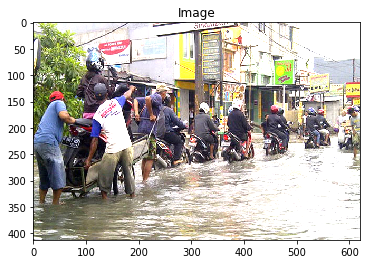

In [72]:
from PIL import ImageEnhance
from PIL import Image as im

def brightness_image(image):
    image = bgr2rgb(image)
    image = im.fromarray(image)
    enh_bri = ImageEnhance.Brightness(image)
    brightness = 1 + random.random()
    image_brightened = np.array(enh_bri.enhance(brightness))
    return rgb2bgr(image_brightened)

show_image(brightness_image(images_data['banjir'][12]))

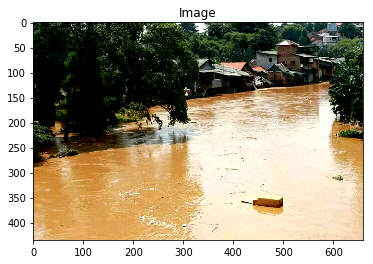

In [73]:
def contrast_image(image):
    image = bgr2rgb(image)
    image = im.fromarray(image)
    enh_con = ImageEnhance.Contrast(image)
    contrast = 1 + random.random()
    image_contrast = np.array(enh_con.enhance(contrast))
    return rgb2bgr(image_contrast)

show_image(contrast_image(images_data['banjir'][13]))

In [74]:
augmentasi_list_function = [scale_image, crop_image, flip_image, rotate_image, 
                            translate_image, brightness_image, contrast_image]

def get_transform(image):
    rand = random.randint(0, 6)
    return augmentasi_list_function[rand](image)

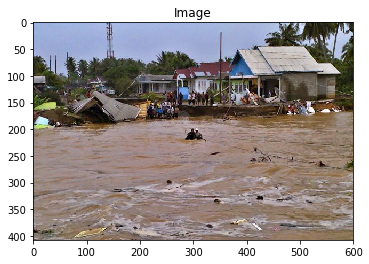

In [75]:
show_image(get_transform(images_data['banjir'][18]))

In [76]:
def augmentasi(data_images, n = 200):
    for images in data_images:
        count = len(data_images[images])
        total = n - count

        a = 0
        for i in range(total):
            if a >= count:
                a -= count
            image_transform = get_transform(data_images[images][a])
            images_data[images].append(image_transform)
            a += 1

In [78]:
count_images(images_data)

Jumlah gambar banjir sebanyak 44 gambar
Jumlah gambar kebakaran sebanyak 44 gambar


In [80]:
augmentasi(images_data)

In [81]:
count_images(images_data)

Jumlah gambar banjir sebanyak 200 gambar
Jumlah gambar kebakaran sebanyak 200 gambar


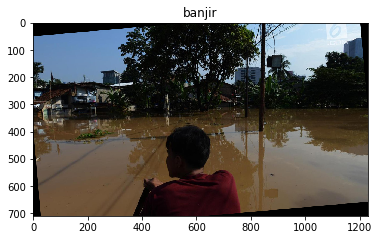

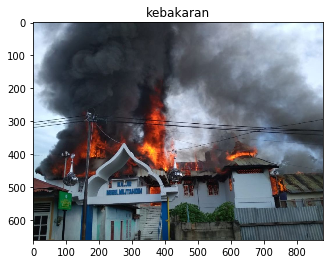

In [85]:
show_images(images_data, sample=True)

## d. Mengubah data menjadi Grayscale menggunakan Adaptive Tresholding. 

In [86]:
def tresholding(image, kind='original'):
    image = bgr2gray(image)
    if kind == 'original':
        return image
    elif kind == 'global':
        ret, image = cv.threshold(image,127,255,cv.THRESH_BINARY)
        return image
    elif kind == 'mean':
        return cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
    elif kind == 'gaussian':
        return cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
    else:
        return False
    
def adaptive_tresholding(images_data, kind = 'original'):

    if type(images_data) is dict:
        result_images = {}
        for images in images_data:
            result_images[images] = []
            for img in images_data[images]:
                img = tresholding(img, kind)
                result_images[images].append(img)

    elif type(images_data) is list:
        result_images = []
        for img in images_data:
            img = tresholding(img, kind)
            result_images.append(img)

    elif type(images_data) is np.ndarray:
        result_images = tresholding(images_data, kind)
    else:
        return False

    return result_images

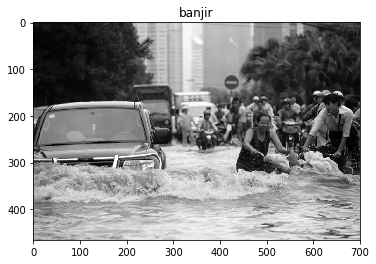

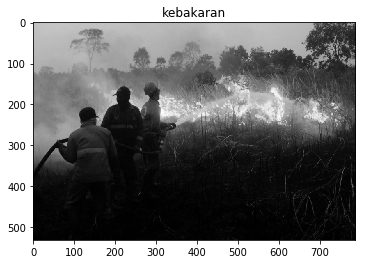

In [94]:
images_data_adaptive = adaptive_tresholding(images_data)
show_images(images_data_adaptive, sample=True)

## e. Melakukan metode Holdout, yaitu membagi data untuk masing-masing kategori menjadi 70% sebagai data latih dan 30 % sebagai data uji.

In [72]:
# target = np.concatenate((np.zeros(len(banjir_images_cv)), np.ones(len(kebakaran_images_cv))))
data_images_filtered = reshape_images_1d(images_data_adaptive['banjir'], (200, 200), False)
# print(len(target), len(data_images_filtered))
# len(data_images)

In [74]:
target = []
for images in data_images_filtered:
#     for img in data_images_filtered[images]:
    target.append('banjir')
np.array(target)

array(['banjir', 'banjir', 'banjir', 'banjir', 'banjir', 'banjir',
       'banjir', 'banjir', 'banjir', 'banjir', 'banjir', 'banjir',
       'banjir', 'banjir', 'banjir', 'banjir', 'banjir', 'banjir',
       'banjir', 'banjir', 'banjir', 'banjir', 'banjir', 'banjir',
       'banjir', 'banjir', 'banjir', 'banjir', 'banjir', 'banjir',
       'banjir', 'banjir', 'banjir', 'banjir', 'banjir', 'banjir',
       'banjir', 'banjir', 'banjir', 'banjir', 'banjir', 'banjir',
       'banjir', 'banjir'], dtype='<U6')

In [107]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

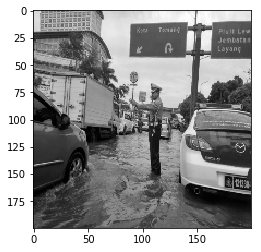

In [108]:
len(data_images)
pixels_img = data_images[1].reshape((200, 200))
plt.imshow(pixels_img, cmap = 'gray')
plt.show()

In [109]:
img_train, img_test, label_train, label_test = train_test_split(data_images, target, test_size= 0.3, random_state=42)

## f. Melakukan fitting model dengan menggunakan algoritma Support Vector Classification. 

In [110]:

clf_svm = svm.SVC()
clf_svm.fit(img_train, label_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [111]:
predictions = clf_svm.predict(img_train)
target = label_train

print("Performance report (train): \n %s \n" %(metrics.classification_report(target,predictions)))

Performance report (train): 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       138
         1.0       1.00      1.00      1.00       142

   micro avg       1.00      1.00      1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280
 



In [112]:
predictions = clf_svm.predict(img_test)
target = label_test

print("Performance report (train): \n %s \n" %(metrics.classification_report(target,predictions)))

Performance report (train): 
               precision    recall  f1-score   support

         0.0       1.00      0.03      0.06        62
         1.0       0.49      1.00      0.66        58

   micro avg       0.50      0.50      0.50       120
   macro avg       0.75      0.52      0.36       120
weighted avg       0.75      0.50      0.35       120
 



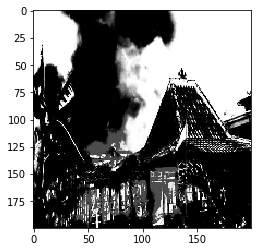

In [115]:
pixels_img = img_test[1].reshape((200, 200))
plt.imshow(pixels_img, cmap = 'gray')
plt.show()

## k. Menjelaskan perbedaan penggunaan metode GET dan POST dalam membuat API. 